# Gradient Decent and Linear regression with one variable

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [5]:
data = pd.read_csv('ex1data1.txt', header = None)

data = np.array(data)
X = data[:, [0]] 
y = data[:, [1]] 

# Plotting the Data

(5, 25)

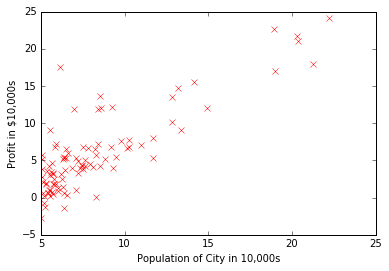

In [6]:
plt.plot(X, y, 'rx', 10)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.xlim(5,25)

Cost function

$$ J(\theta) =  \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2 $$

where

$$ h_\theta(x) = {\theta^T}x = \theta_0 +{\theta_1}x_1 $$

but for X

$$ h_\theta(x) =X * \theta $$

Linear Regression
with Gradient Decent


$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} $$ 


In [7]:
X = np.insert(X, 0, values=1, axis=1)
theta = np.zeros((2,1)) #initialize fitting parameters
iterations = 1500
alpha = 0.01

In [8]:
def computeCost(X, y, theta):
    m = float(len(y))  
    J = (1/(2*m))*((X.dot(theta) - y)**2).sum()

    return J

In [9]:
computeCost(X, y, theta)

32.072733877455676

In [10]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = float(len(y)) 
    J_history = np.zeros((num_iters,1))    
    
    for iter in range(num_iters):
        
        theta = theta - (alpha/m) * (X.transpose().dot(X.dot(theta) - y))
        
        J_history[iter] = computeCost(X, y, theta)
        
    return  theta

In [11]:
theta = gradientDescent(X, y, theta, alpha, iterations)
print "Theta found by gradient descent:", str(theta[0,0]) +",", str(theta[1,0])

#octave -3.630291 1.166362

Theta found by gradient descent: -3.6302914394, 1.16636235034


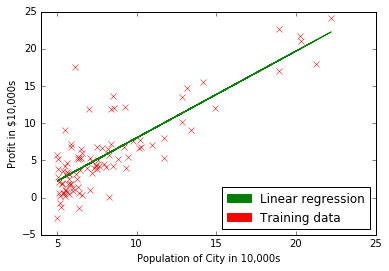

In [12]:
plt.plot(X, y, 'rx', 10)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.xlim(4,25)
plt.plot(X[:,[1]], X.dot(theta), '-')

red_patch = mpatches.Patch(color='red', label='Training data')
green_patch = mpatches.Patch(color='green',linestyle='-', label='Linear regression')
plt.legend(handles=[green_patch, red_patch], loc=4)

In [13]:
def predict(X, theta):
    
    if X.shape[1] != theta.shape[0]:
        if X.shape[1]+1 == theta.shape[0]:
            X =np.insert(X, 0, values=1, axis=1)
        else:
            raise IndexError('dimensions incorrect')
           
    prediction = X.dot(theta)
    return prediction 

In [14]:
predict1 = np.array([1, 3.5]).dot(theta)
print 'For population = 35,000, we predict a profit of', str(predict1[0]*10000)

predict2 = np.array([1, 7]).dot(theta)
print 'For population = 70,000, we predict a profit of', str(predict2[0]*10000)

For population = 35,000, we predict a profit of 4519.7678677
For population = 70,000, we predict a profit of 45342.4501294


# Linear regression with multiple variables

In [15]:
data2 = pd.read_csv('ex1data2.txt', header = None)
data2 = np.array(data2)
X1 = data2[:, [0, 1]]
y1 = data2[:,[2]]

Feature Normalization
$$ x_i=\frac{x_i - \mu_i}{\sigma_i} $$
where
 $ \mu_i $ is avarage value of  $x_i$

 $ \sigma_i $ is range (max - min) or standart deviation 
 

In [16]:
def featureNormalize(X):
    mu = np.mean(X,axis = 0)
    sigma = np.std(X, axis = 0, ddof=1)
    X_norm = (X - mu)/sigma
    
    return X_norm

In [17]:
X1 = featureNormalize(X1) 

In [18]:
X1 = np.insert(X1, 0, values=1, axis=1)

In [19]:
theta1 = np.zeros((3,1)) #initialize fitting parameters
alpha1 = 0.01
num_iters1 = 400

Cost Function (Multivariate case)

$$ J(\theta) =  \frac{1}{2m}(X\theta-\vec{y})^T(X\theta-\vec{y}) $$

In [20]:
def computeCostMulti(X, y, theta):
    m = float(len(y))
    J = (1/(2*m))*((X.dot(theta)-y).transpose()).dot(X.dot(theta)-y)
    
    return J

In [21]:
def gradientDescentMulti (X, y, theta, alpha, num_iters):
    m = float(len(y))
    J_history = np.zeros((num_iters,1))
    
    for iter in range(num_iters):
        theta = theta - (alpha/m) * (X.transpose().dot(X.dot(theta) - y))
        J_history[iter] = computeCostMulti(X, y, theta)
        
    return  theta

In [22]:
theta1 = gradientDescentMulti(X1, y1, theta1, alpha1, num_iters1)
print "Theta found by gradient descent:", str(theta1[0,0]) +",", str(theta1[1,0]) +",", str(theta1[2,0])

Theta found by gradient descent: 334302.063993, 100087.116006, 3673.54845093


In [26]:
print predict(X1,theta1)


[[ 346492.69520391]
 [ 283017.47552873]
 [ 383771.79247346]
 [ 255016.6030121 ]
 [ 464164.90980135]
 [ 336332.87017772]
 [ 274705.24438079]
 [ 261229.35448943]
 [ 255310.03836893]
 [ 269667.52853355]
 [ 330665.43984958]
 [ 333394.6340011 ]
 [ 319540.9154212 ]
 [ 655135.88997608]
 [ 241204.43399667]
 [ 376004.88247471]
 [ 242926.08497874]
 [ 237174.26131888]
 [ 414921.23739461]
 [ 468069.13958296]
 [ 304049.93919094]
 [ 314461.65000949]
 [ 283521.24711345]
 [ 333436.18356556]
 [ 571426.70778302]
 [ 220046.02743827]
 [ 265133.58427104]
 [ 399640.59739226]
 [ 358583.21323728]
 [ 413620.25886834]
 [ 308290.44809663]
 [ 197796.9785815 ]
 [ 343259.72946767]
 [ 476591.70695879]
 [ 314418.80624224]
 [ 262488.78345124]
 [ 237552.09000742]
 [ 354846.47591632]
 [ 617185.52866116]
 [ 358624.76280174]
 [ 286250.44126497]
 [ 363369.04329215]
 [ 409631.63575501]
 [ 232640.31705637]
 [ 183984.80956607]
 [ 319582.46498566]
 [ 233018.14574491]]
